# CME 193 - Lecture 4: Data Management and Manipulation with Pandas

# Announcement

- Homework 1 has been released and is due on **Oct. 31, 2025 (Friday), 11:59 PM**. Please email `tianyudu@stanford.edu` if you face any challenges meeting this deadline.
- You can apply your late days to this homework.

# Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with tabular data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

## Difference between a DataFrame and NumPy Array

Pandas DataFrames and NumPy arrays both have similarities to Python lists.  
* NumPy arrays are designed to contain data of one type (e.g. Int, Float, ...)
* DataFrames can contain different types of data (Int, Float, String, ...)
    * Usually each column has the same type
    
    
Both arrays and DataFrames are optimized for storage/performance beyond Python lists

Pandas is also powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key Features

* File I/O - integrations with multiple file formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
* Time series-specific functionality:
    * date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
* Built in Matplotlib integration for basic plotting

## Other Strengths

* Strong community, support, and documentation
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

## Python/Pandas vs. R

* R is a language dedicated to statistics. Python is a general-purpose language with statistics modules.
* R has more statistical analysis features than Python, and specialized syntaxes.

However, when it comes to building complex analysis pipelines that mix statistics with e.g., text mining, or control of a physical experiment, the richness of Python is an invaluable asset.

## Objects and Basic Creation

| Name | Dimensions | Description  |
| ------:| -----------:|----------|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |

## Getting Started

[Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a link to the documentation for DataFrames

# References and Further Reading

## Additional Pandas Resources
- [Pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html)
- [Pandas API reference](https://pandas.pydata.org/docs/reference/index.html)
- [10 minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [IO tools (read_csv and friends)](https://pandas.pydata.org/docs/user_guide/io.html)
- [GroupBy user guide](https://pandas.pydata.org/docs/user_guide/groupby.html)
- [Reshaping/Pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html)
- [Merging/joining](https://pandas.pydata.org/docs/user_guide/merging.html)
- [Visualization](https://pandas.pydata.org/docs/user_guide/visualization.html)

## For plotting beyond the basics, which we will cover in future lectures, see:
- [Matplotlib](https://matplotlib.org/stable/users/index.html)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)


Reading the Series display (repr)

- Purpose: print a Series to inspect index, values, name, and dtype
- Inputs: none (just evaluate/print the Series)
- Output: formatted text showing index labels, values, `Name:`, and `dtype:`

Explanation (beginner-friendly): This printed view is like looking at a neat list with labels on the left and numbers or text on the right. It helps you quickly confirm you built the Series you expected before doing more work.

Reference: [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).



In [1]:
import pandas as pd  # import the pandas library as 'pd' (convention)
import numpy as np   # import NumPy for numerical arrays

# Make printed DataFrames easier to read in the notebook
pd.set_option("display.max_rows", 20)        # show at most 20 rows when printing
pd.set_option("display.max_columns", 10)     # show at most 10 columns when printing

# A helper string we can print between sections for readability
endstring = '\n' + '-'*50 + '\n'

# Pandas Series (1D Array in Pandas)
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
- The axis labels are collectively referred to as the **index**.
- Basic method to create a series:

```python
s = pd.Series(value, index=index, name=name)
```

where

- `value` can be many things:
    * A 1-D NumPy array or regular Python list
    * A Python Dictionary (with keys as labels and values as values)
    * A scalar (e.g., a single number, create a series with a single value repeated)

- The passed `index` is a list of axis labels (which varies on what data is). 
    * **Default** index is `(0, 1, 2, ..., len(value) - 1)` if not provided.
- `value` and `index` must have the same length.
- `name` provides a name to the series; this is particularly helpful if you are working with multiple series.

You can think of a Series as a vector with optional labels and an optional name.

## Example of creating a Series: ice-cream sales in the past week

In [2]:
# Create a Series with daily ice-cream sales; labels on the left are the index
first_series = pd.Series(
    [1, 2, 3, 8, 16, 32, 64],  # values of the
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],  # index labels
    name="sale",  # optional name for this Series
)
# Print the Python type and a separator for readability
print(first_series)

Monday        1
Tuesday       2
Wednesday     3
Thursday      8
Friday       16
Saturday     32
Sunday       64
Name: sale, dtype: int64


In [3]:
# Print the Series to see labels, values, name, and dtype
print(first_series)

Monday        1
Tuesday       2
Wednesday     3
Thursday      8
Friday       16
Saturday     32
Sunday       64
Name: sale, dtype: int64


## Inspect a Series

- Check: `s.index` (labels), `s.name` (column name if used in DataFrame), `s.dtype`
- Optionally: `s.head()`, `s.isna().sum()` to gauge content and missingness

Explanation: Validating shape and metadata early avoids subtle alignment bugs when assembling multiple Series into a table.


In [4]:
# Access the index (labels) and the raw values array
print(f"Index: {first_series.index}")
print(f"Values: {first_series.values}")

Index: Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')
Values: [ 1  2  3  8 16 32 64]


## Two (Popular) Ways to Access Values in a Series: selecting with `.loc` (label-based selection) and `.iloc` (position-based)
Think of `.loc` as “find by name” and `.iloc` as “find by number.” If your rows are labeled by student names or dates, `.loc` lets you ask for them directly. If you just want “the first 10 rows” or “rows 5 through 9,” use `.iloc`.

- `.loc[row_labels, col_labels]`: labels, lists of labels, boolean masks (aligned to index), label slices (`a:b` inclusive)
- `.iloc[row_sel, col_sel]`: integer positions, position-based slices (`start:stop`, end-exclusive), lists/arrays of ints, boolean arrays aligned by position
- Output: Series (single axis) or DataFrame (2D) for both
- Rules: `.loc` is label-aware; `.iloc` is strictly positional

References: [DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), [DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).


### 1. Use `.iloc(<INTEGER>)` to access values by position

In [5]:
# Get the 2nd value by position (0-based indexing)
first_series.iloc[1]

np.int64(2)

### 2. Use `.loc(<LABEL>)` to access values by index label

In [6]:
# Get the value labeled "Tuesday" (label-based selection)
first_series.loc["Tuesday"]

np.int64(2)

## Iterating over the series with `Series.items()`, just like iterating over a dictionary
If you’ve looped over a Python dict with `.items()`, this is similar: you get each label (like a key) and its value. For calculations, prefer built-in Series methods instead of loops—they’re faster and less error-prone.

- Purpose: iterate over `(index, value)` pairs of a Series
- Output: generator yielding tuples `(label, scalar_value)`
- Usage: quick inspection, simple side effects (e.g., printing)


Reference: [Series.items](https://pandas.pydata.org/docs/reference/api/pandas.Series.items.html).


In [7]:
# Iterate over (label, value) pairs; useful for quick printing
for (index, value) in first_series.items():
    print(f"key: {index} -> value: {value}")  # show the label and the value
    print("-" * 25)                            # divider for readability

key: Monday -> value: 1
-------------------------
key: Tuesday -> value: 2
-------------------------
key: Wednesday -> value: 3
-------------------------
key: Thursday -> value: 8
-------------------------
key: Friday -> value: 16
-------------------------
key: Saturday -> value: 32
-------------------------
key: Sunday -> value: 64
-------------------------


## There is much more you can do with a `Series` (e.g., sorting)... but `DataFrame` is much more interesting!

# Pandas DataFrame
- [**pandas.DataFrame**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
 is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects, where each `Series` is a column. It is generally the most commonly used pandas object.
- You can create a DataFrame from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D NumPy array
    - A list of dictionaries
    - Another DataFrame

``` python
df = pd.DataFrame(data, index = index, columns = columns)
```

- `index` / `columns` are lists of row/column labels. If you pass them, you are guaranteeing the index and/or columns of the DataFrame.
- If you do not pass anything in, the input will be constructed by "common sense" rules

Annotation: `np.array` (homogeneous arrays)

- Syntax: `np.array(object, dtype=None)`
- Inputs: sequence-like object; optional `dtype`
- Output: NumPy ndarray with a single dtype

Explanation: NumPy arrays enforce a uniform dtype across elements, unlike DataFrames which can host heterogeneous column dtypes. Keep this in mind when converting between structures.


# Creating a DataFrame
## Creating a DataFrame of Homogeneous Type Data (e.g., all float numbers)

In [8]:
data = np.random.randn(10, 4)  # 10 rows, 4 columns of random numbers, need 10*4 numbers.
df = pd.DataFrame(
    data,
    index=["indexA", "indexB", "indexC", "indexD", "indexE", "indexF", "indexG", "indexH", "indexI", "indexJ"],  # label, or names of the rows.
    columns=["column_W", "column_X", "column_Y", "column_Z"]  # names of columns.
)
df

,column_W,column_X,column_Y,column_Z
indexA,-1.002632,-1.228393,0.619460,1.074275
indexB,-0.499830,0.378171,0.301020,-0.516372
indexC,-1.130467,-1.741562,1.841163,-0.012810
indexD,-0.530379,-1.467926,-1.139173,0.312191
indexE,0.764504,-0.245632,0.198029,1.058299
indexF,0.273175,-0.039831,-1.437588,0.652510
indexG,-0.130781,-1.020279,-0.191197,1.008967
indexH,1.313040,0.726827,0.711391,0.076709
indexI,-1.288693,-0.002964,-1.819494,0.035672
indexJ,0.136734,-0.252274,-0.148165,-0.393443



## Creating a DataFrame from a Dictionary of Series `pd.DataFrame({"column_name": series, "column_name": series, ...})`
One can create a DataFrame from a dictionary of Series
- The index of the resulting DataFrame will be the union of the indices of the various Series. If there are any nested dicts, these will be first converted to Series.
- If no columns are passed, the columns will be the sorted list of dict keys.
- Series can have different data types.
- The series don't need to be the same length (i.e., could have missing values).

How Series align by index when combined: alignment by label is a core Pandas feature that prevents accidental row mixing. Mismatched labels surface as `NaN`, signaling data that needs reconciliation.

- Behavior: aligns rows by index labels when multiple Series are combined (e.g., into a DataFrame)
- Inputs: Series with potentially different indices
- Output: aligned result with union of labels; missing matches become `NaN`

In [9]:
# Create a dictionary of series
# Columns are dictionary keys, indices and values obtained from series
a_series = pd.Series([10, 20, 30, 40], index=["1_Monday", "2_Tuesday", "3_Wednesday", "4_Thursday"], name="an integer series")
b_series = pd.Series([0.5, 0.6, 0.7], index=["1_Monday", "2_Tuesday", "3_Wednesday"], name="a float series")
c_series = pd.Series(["Ben & Jerry's", "Häagen-Dazs", "Breyers", "Blue Bell"], index=["1_Monday", "2_Tuesday", "3_Wednesday", "4_Thursday"], name="a string series")

In [10]:
a_series

1_Monday       10
2_Tuesday      20
3_Wednesday    30
4_Thursday     40
Name: an integer series, dtype: int64

In [11]:
b_series

1_Monday       0.5
2_Tuesday      0.6
3_Wednesday    0.7
Name: a float series, dtype: float64

In [12]:
c_series


1_Monday       Ben & Jerry's
2_Tuesday        Häagen-Dazs
3_Wednesday          Breyers
4_Thursday         Blue Bell
Name: a string series, dtype: object

Building a DataFrame from dicts/lists (row-wise construction)

- Inputs: dict mapping column name -> list/ndarray
- Requirements: all arrays must be the same length unless you pass an explicit `index`
- Optional: specify `columns` order and `index` labels
- Output: DataFrame with given columns and a default RangeIndex if none provided

Explanation: This is the most common constructor when loading data already in Python objects. Validate lengths early to avoid silent misalignment.


In [13]:
df = pd.DataFrame(data={
    "ice-cream sales": a_series,
    "ice-cream price": b_series,  # <-- note that b_series is shorter than the other two series.
    "ice-cream brand": c_series
})
# Note: pandas use NaN to fill in the missing value in series (i.e., no Thursday sale price here).
df

,ice-cream sales,ice-cream price,ice-cream brand
1_Monday,10,0.5,Ben & Jerry's
2_Tuesday,20,0.6,Häagen-Dazs
3_Wednesday,30,0.7,Breyers
4_Thursday,40,NaN,Blue Bell


## Creating a DataFrame from a Dictionary of Lists/Arrays `pd.DataFrame({"column_name": list/array, "column_name": list/array, ...})`
If creating a DataFrame from a dictionary of ndarrays/lists:
- The ndarrays/lists must all be the same length because a list/array does not have an index, so there is no way to align the data by index.
- If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.
- Different types of data can still be combined in a DataFrame.

In [14]:
d = {"float_data": [1.0, 2.0, 3.0, 4], "int_data": [4.0, 3.0, 2.0, 1.0], "str_data": [1, 2, 3, 4]}
pd.DataFrame(d, index=["a", "b", "c", "d"])

,float_data,int_data,str_data
a,1.0,4.0,1
b,2.0,3.0,2
c,3.0,2.0,3
d,4.0,1.0,4


## Load Data from CSV using [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
Reading CSV files with `pd.read_csv`, think of this as “open a spreadsheet file as a table in Python.” You can tell pandas which columns to read (`usecols`), what types to use (`dtype`), and which columns are dates (`parse_dates`). Only set `index_col` when you truly want that column to become the row labels.

- Syntax: `pd.read_csv(path, usecols=None, dtype=None, parse_dates=None, index_col=None, nrows=None)`
- Inputs: file path/URL; optional column subset and dtypes; date parsing; index column
- Output: DataFrame

Reference: [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).


In [15]:
# Read the CSV file from the local directory into a DataFrame
# pd.read_csv parses the file and infers column types (you can specify dtypes if needed)
df_students = pd.read_csv("./student_grades.csv")
# You can also read from GitHub and other remote resources; this may be slower for large files
# Example:
# df_students = pd.read_csv(
#     "https://raw.githubusercontent.com/TianyuDu/CME193-Autumn-2025/refs/heads/main/notebooks/student_grades.csv"
# )

In [16]:
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True
5,Farah Khan,67,74,85,False
6,George Nguyen,89,86,93,True
7,Hiro Tanaka,100,98,99,False
8,Isabella Rossi,93,95,97,True
9,Jamal Carter,72,78,90,False


### Speaking of `pd.read_csv()`, you can also write to a csv file using `DataFrame.to_csv()`; Pandas supports many different file formats such as Excel, JSON, HDF5, etc. Please see the [Pandas I/O documentation](https://pandas.pydata.org/docs/user_guide/io.html) for a complete list.

# Data Summarization

## Getting quick structure and stats with `describe()` and `info()`

- `DataFrame.describe(include=None, percentiles=None)`: numeric summary by default; `include="all"` adds non-numeric; control quantiles via `percentiles`
- `DataFrame.info(memory_usage="deep")`: dtypes, non-null counts, memory footprint
- Outputs: summary DataFrame and printed schema-like report

Explanation: Start with `info()` to validate column types and missingness; follow with `describe()` for distributional insight. For large text columns, `memory_usage="deep"` reveals true footprint.


In [17]:
# By default, only summarize numeric columns.
df_students.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,hw1_grade,hw2_grade,attendance_pct
count,16.000000,16.00000,16.000000
mean,86.500000,87.37500,94.062500
std,9.563821,8.13941,4.582121
min,67.000000,74.00000,85.000000
1%,67.750000,74.30000,85.450000
10%,74.000000,77.00000,88.500000
25%,80.500000,81.25000,90.750000
50%,88.500000,87.50000,94.500000
75%,93.250000,94.25000,98.000000
90%,97.500000,97.00000,99.500000


In [18]:
# Show non-null counts, dtypes, and memory usage (deep tries to estimate object column memory)
df_students.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   student_name    16 non-null     object
 1   hw1_grade       16 non-null     int64 
 2   hw2_grade       16 non-null     int64 
 3   attendance_pct  16 non-null     int64 
 4   letter_grade    16 non-null     bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 1.5 KB


## Quickly inspecting your data (`head`, `tail`, `sample`, `shape`, `dtypes`)

- `df.head(n)`, `df.tail(n)`, `df.sample(n)`: preview rows from top/bottom/random sample
- `df.shape` → tuple `(num_rows, num_cols)`; `df.dtypes` → Series of column dtypes
- Output: DataFrame/Series previews and quick structural metadata

Explanation: Use small peeks to sanity-check parsing and column types without flooding output. Random sampling can surface rare categories or outliers not visible at the head.

References: `DataFrame.head` (`https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html`), `DataFrame.tail` (`https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html`), `DataFrame.sample` (`https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html`), `DataFrame.dtypes` (`https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html`).



In [19]:
# Basic inspect of table size
print("len(df_students):", len(df_students))            # number of rows
print("df_students.shape:", df_students.shape)          # (rows, columns); index is not counted as a column

len(df_student): 16
df_student.shape: (16, 5)


In [20]:
# Peek at the first few rows to get a sense of what's in the DataFrame
# head(n) returns the first n rows; common default is 5
# This helps verify column names, types, and sample values
df_students.head(n=5)

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True


In [21]:
# Peek at the last few rows to see the bottom of the table
df_students.tail(n=5)

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
11,Leo Martins,79,83,91,False
12,Maya Patel,90,87,94,True
13,Noah Williams,81,76,89,False
14,Olivia Brown,94,96,98,True
15,Tianyu Du,100,100,100,False


#### Note: a DataFrame has "heterogeneous" data types, which means that the data in different columns can be of different types.

In [22]:
# Show the data type (dtype) of each column; object = text strings
print(df_students.dtypes)

student_name      object
hw1_grade          int64
hw2_grade          int64
attendance_pct     int64
letter_grade        bool
dtype: object


## Counting categories with `value_counts()` and measuring uniqueness with `nunique()`

- `Series.value_counts(normalize=False, dropna=True)`: counts occurrences per unique value; set `normalize=True` for proportions
- `Series.nunique(dropna=True)`: number of distinct values
- Output: Series of counts (sorted desc) and an integer count, respectively

Imagine making a tally of how many times each name appears; `value_counts()` does that for you, optionally as percentages. `nunique()` answers “how many different names are there?” If missing values matter to your question, include them with `dropna=False`.

References: [Series.value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html), [Series.nunique](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html).


In [23]:
# Number of distinct student names (cardinality)
df_students["student_name"].nunique()

16

In [24]:
# The number of rows for each unique value of the column letter_grade
df_students["letter_grade"].value_counts()

letter_grade
True     8
False    8
Name: count, dtype: int64

In [25]:
# Get the number of occurrences of each unique value in the student_name column
# This is less interesting here because each student only appears once
# value_counts returns a Series with counts sorted descending by default
df_students["student_name"].value_counts()

student_name
Alice Chen        1
Brian Kim         1
Carla Gomez       1
David Li          1
Elena Petrova     1
Farah Khan        1
George Nguyen     1
Hiro Tanaka       1
Isabella Rossi    1
Jamal Carter      1
Kara Singh        1
Leo Martins       1
Maya Patel        1
Noah Williams     1
Olivia Brown      1
Tianyu Du         1
Name: count, dtype: int64

# Subsetting the DataFrame: Indexing and Selection
Overview of selection methods—use `df[...]` for columns, `.loc` for label-based selection, and `.iloc` for position-based selection.

- 3 methods ``` [],  iloc, loc ```

| Operation  | Syntax       | Result |
|----|----------------------| ---------------------------|
| Select a Single Column | `df[col]`   |    Series                      |
| Select a Single Column but I really want a DataFrame | `df[[col]]` | DataFrame |
| Select Multiple Columns | `df[[col1, col2]]` | DataFrame |
| Select Row by Label | `df.loc[label]` | Series  |
| Select Row by Integer Location | `df.iloc[idx]` |      Series                    |
| Slice rows | `df[5:10]`        |                        DataFrame  |
| Select rows by boolean | `df[mask]`   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

### Note: think of a DataFrame as a bunch of Series objects, one Series for each column.

## Selecting Columns using `df[..] -> Series` (single square bracket) or `df[[...]] -> DataFrame` (double square bracket)
- Selecting a single column using `df["col"]` gives you a Series
- DataFrame: select a single or multiple columns:

In [26]:
a = df_students["hw1_grade"]
print(a)
print(type(a))

0      95
1      88
2      76
3      84
4      91
5      67
6      89
7     100
8      93
9      72
10     85
11     79
12     90
13     81
14     94
15    100
Name: hw1_grade, dtype: int64
<class 'pandas.core.series.Series'>


In [27]:
# suppose you really want to get a DataFrame (for what reason?) with only one column.
d = df_students[["hw1_grade"]]
print(d)
print(type(d))

    hw1_grade
0          95
1          88
2          76
3          84
4          91
5          67
6          89
7         100
8          93
9          72
10         85
11         79
12         90
13         81
14         94
15        100
<class 'pandas.core.frame.DataFrame'>


In [28]:
# suppose only want to share the distribution of grades without revealing the student names.
c = df_students[["hw1_grade", "hw2_grade", "attendance_pct"]]
print(c)
print(type(c))

    hw1_grade  hw2_grade  attendance_pct
0          95         92              98
1          88         90              96
2          76         82              92
3          84         79              88
4          91         94             100
5          67         74              85
6          89         86              93
7         100         98              99
8          93         95              97
9          72         78              90
10         85         88              95
11         79         83              91
12         90         87              94
13         81         76              89
14         94         96              98
15        100        100             100
<class 'pandas.core.frame.DataFrame'>


## Selecting Rows

Row selection with `.loc` vs `.iloc`

- `.loc` uses labels (names) for row selection, provides a list of labels to select rows.
- `.iloc` uses integer positions and excludes the stop in slices (`a:b` returns rows a…b-1)

References: [DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), [DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [29]:
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True
5,Farah Khan,67,74,85,False
6,George Nguyen,89,86,93,True
7,Hiro Tanaka,100,98,99,False
8,Isabella Rossi,93,95,97,True
9,Jamal Carter,72,78,90,False


In [30]:
# Select rows by label from 0 to 5 inclusive (label-based slice is inclusive)
df_students.loc[0:5]

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True
5,Farah Khan,67,74,85,False


In [31]:
# Select rows by integer position 0..4 (stop is excluded)
df_students.iloc[0:5]

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True


In [32]:
df_students_v2 = df_students.set_index("student_name")
df_students_v2

,hw1_grade,hw2_grade,attendance_pct,letter_grade
student_name,,,,
Alice Chen,95,92,98,True
Brian Kim,88,90,96,False
Carla Gomez,76,82,92,True
David Li,84,79,88,False
Elena Petrova,91,94,100,True
Farah Khan,67,74,85,False
George Nguyen,89,86,93,True
Hiro Tanaka,100,98,99,False
Isabella Rossi,93,95,97,True


In [33]:
# Use loc to select rows by label, the list must be a subset of the index!
# You can also duplicate a row by using the same label multiple times.
df_students_v2.loc[["Olivia Brown", "Tianyu Du", "Tianyu Du"]]

,hw1_grade,hw2_grade,attendance_pct,letter_grade
student_name,,,,
Olivia Brown,94,96,98,True
Tianyu Du,100,100,100,False
Tianyu Du,100,100,100,False


## Filtering rows with boolean masks

- Compose conditions with `&` (and) and `|` (or); wrap each condition in parentheses
- Apply mask with `.loc[mask, columns]` to be explicit about rows and columns

Explanation (beginner-friendly): Create a “True/False per row” Series that answers a yes/no question (e.g., “is attendance < 90?”). Then use that Series to keep only the rows where the answer is True.

References: [Boolean indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing), [DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).



In [34]:
# Build a boolean mask: True for rows that meet a condition
boolean_mask = [True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]

# A realistic example:
# boolean_mask = (df_students["letter_grade"] == True)

# Use the mask to select rows; here we use .iloc with the boolean array
# (equivalently: df_students.loc[boolean_mask, :])
df_students[boolean_mask]

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
2,Carla Gomez,76,82,92,True
4,Elena Petrova,91,94,100,True
6,George Nguyen,89,86,93,True
8,Isabella Rossi,93,95,97,True
10,Kara Singh,85,88,95,True
12,Maya Patel,90,87,94,True
14,Olivia Brown,94,96,98,True


### Note: `df[...]` is acting both as a row and column selector, depending on what we put inside `[]`.

In [35]:
# A concise way to filter rows directly with a boolean expression
# This keeps rows where letter_grade is True
df_students[df_students["letter_grade"] == True]

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
2,Carla Gomez,76,82,92,True
4,Elena Petrova,91,94,100,True
6,George Nguyen,89,86,93,True
8,Isabella Rossi,93,95,97,True
10,Kara Singh,85,88,95,True
12,Maya Patel,90,87,94,True
14,Olivia Brown,94,96,98,True


In [36]:
# Another filter example: keep rows where student_name is not a specific value
df_students[df_students["student_name"] != "Tianyu Du"]

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
1,Brian Kim,88,90,96,False
2,Carla Gomez,76,82,92,True
3,David Li,84,79,88,False
4,Elena Petrova,91,94,100,True
5,Farah Khan,67,74,85,False
6,George Nguyen,89,86,93,True
7,Hiro Tanaka,100,98,99,False
8,Isabella Rossi,93,95,97,True
9,Jamal Carter,72,78,90,False


## Writing filters with `DataFrame.query()`

- Express conditions as strings (e.g., `"attendance_pct < 90 and letter_grade == True"`)
- Column names become variables in the expression

If you find long chains of `&`/`|` hard to read, `query` lets you write the condition like a sentence. It can make complex filters easier to maintain.

Reference: [DataFrame.query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html).



In [37]:
# Use query to express filters as a readable string
# Here: keep rows where letter_grade is True
df_students.query("letter_grade == True")

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
0,Alice Chen,95,92,98,True
2,Carla Gomez,76,82,92,True
4,Elena Petrova,91,94,100,True
6,George Nguyen,89,86,93,True
8,Isabella Rossi,93,95,97,True
10,Kara Singh,85,88,95,True
12,Maya Patel,90,87,94,True
14,Olivia Brown,94,96,98,True


In [38]:
# Another query example: keep rows where attendance is below 90%
df_students.query("attendance_pct < 90")

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade
3,David Li,84,79,88,False
5,Farah Khan,67,74,85,False
13,Noah Williams,81,76,89,False


## Data filtering based on NaN values
Handling missing values

- `dropna()` removes rows (or columns when `axis=1`) containing missing values; use `subset=[...]` to limit which columns are checked
- `fillna(value or method)` replaces missing values with a provided value or method (e.g., forward-fill)

Explanation (beginner-friendly): Missing values are blanks—either discard rows that have them or fill them with a sensible default. Choose based on what makes sense for your analysis.

References: [DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html), [DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).


```python
# drop all rows with NaN values in all columns
df = df.dropna()
# drop all rows with NaN values in a specific column
df = df.dropna(subset=["column_name"])
# drop all rows with NaN values in any column
df = df.dropna(axis=0)
# drop all columns with NaN values in any row
df = df.dropna(axis=1)

```

# Groupby-Aggregation Operations (Optional)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:
    - ``` groups = df.groupby([key1, key2]) ```

- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results

![image](https://i.stack.imgur.com/sgCn1.jpg)

Grouping with `groupby`

- `df.groupby(keys)`: split the table into groups based on one or more columns
- Apply reducers (like `.mean()`, `.sum()`) or use `.agg({...})` to compute several statistics at once
- Use `.transform(...)` when you want to compute per-group values but keep the original row shape (e.g., z-scores within each group)

Explanation (beginner-friendly): Think “split-apply-combine.” First split rows into groups (e.g., by major), then apply the same calculation to each group, then combine the results into a new table.

References: [GroupBy basics](https://pandas.pydata.org/docs/user_guide/groupby.html), [GroupBy.agg](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.agg.html), [GroupBy.transform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.transform.html).



In [39]:
# Group rows by the 'letter_grade' boolean column (True/False)
g = df_students.groupby("letter_grade")
# Show the GroupBy object (lazy until you call an aggregation)
g

In [40]:
# Compute the per-group mean for selected numeric columns
print(g["hw1_grade"].mean())      # average HW1 by letter_grade group
print(g["hw2_grade"].mean())      # average HW2 by letter_grade group
print(g["attendance_pct"].mean()) # average attendance by letter_grade group

letter_grade
False    83.875
True     89.125
Name: hw1_grade, dtype: float64
letter_grade
False    84.75
True     90.00
Name: hw2_grade, dtype: float64
letter_grade
False    92.250
True     95.875
Name: attendance_pct, dtype: float64


In [41]:
# Using agg function with dictionary to compute multiple aggregations at once
print(g.agg({
    "hw1_grade": "mean",
    "hw2_grade": "mean",
    "attendance_pct": "mean"
}))

              hw1_grade  hw2_grade  attendance_pct
letter_grade                                      
False            83.875      84.75          92.250
True             89.125      90.00          95.875


In [42]:
# Compute per-group maxima using agg with a dict of column -> function
print("Using agg function with dict:")
print(g.agg({
    "hw1_grade": "max",
    "hw2_grade": "max",
    "attendance_pct": "max"
}))

Using agg function with dict:
              hw1_grade  hw2_grade  attendance_pct
letter_grade                                      
False               100        100             100
True                 95         96             100


# Create new columns by modifying existing datasets.

## Create a new column by working with existing columns (recommended, vectorized operation is faster and more readable than loops)
Creating derived columns, treat columns like arrays: `df["hw_grade"] = (df["hw1_grade"] + df["hw2_grade"]) / 2`. Vectorized code is faster and more readable than loops.

- Use vectorized arithmetic (operate on entire columns) to build new columns quickly
- Assign with `df["new_col"] = ...` or use `df.assign(new_col=...)` to return a modified copy


References: [DataFrame.assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html), [Binary ops](https://pandas.pydata.org/docs/user_guide/basics.html#binary-operator-functions).

In [43]:
# Compute an average homework grade and store it in a new column
# Vectorized arithmetic operates on whole columns efficiently
df_students["hw_grade"] = (df_students["hw1_grade"] + df_students["hw2_grade"]) / 2
# Display the updated DataFrame to confirm the new column
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade
0,Alice Chen,95,92,98,True,93.5
1,Brian Kim,88,90,96,False,89.0
2,Carla Gomez,76,82,92,True,79.0
3,David Li,84,79,88,False,81.5
4,Elena Petrova,91,94,100,True,92.5
5,Farah Khan,67,74,85,False,70.5
6,George Nguyen,89,86,93,True,87.5
7,Hiro Tanaka,100,98,99,False,99.0
8,Isabella Rossi,93,95,97,True,94.0
9,Jamal Carter,72,78,90,False,75.0


## Applying row-wise logic
If the new column requires a complicated computation, use the `apply` function. Row-wise apply is like a for-loop over the rows. It’s handy for custom rules, but try to phrase your logic in column-wise operations first.

- `df.apply(func, axis=1)` runs a Python function on each row and combines the results (axis=1 means row-wise)
- Prefer vectorized alternatives (`np.select`, `pd.cut`, arithmetic/comparisons) when possible—they’re faster and clearer

References: [DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

In [44]:
# Assign letter grades based on conditions
# This function receives a row (like a dict of column -> value) and returns a single grade string

def assign_grade(row):
    # Check whether the student is taking the letter-graded option
    if row["letter_grade"] == True:
        # F if attendance is below threshold regardless of scores
        if row["attendance_pct"] < 90:
            return "F"
        # A for average homework >= 90, else B
        if row["hw_grade"] >= 90:
            return "A"
        elif row["hw_grade"] >= 80:
            return "B"
        else:
            return "C"
    else:
        # For P/NP: NP if attendance is below threshold; otherwise P
        if row["attendance_pct"] < 90:
            return "NP"
        else:
            return "P"

# Apply the function to each row (axis=1) to compute the final letter grade
df_students["grade"] = df_students.apply(assign_grade, axis=1)
# Show the DataFrame with the new grade column
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade,grade
0,Alice Chen,95,92,98,True,93.5,A
1,Brian Kim,88,90,96,False,89.0,P
2,Carla Gomez,76,82,92,True,79.0,C
3,David Li,84,79,88,False,81.5,NP
4,Elena Petrova,91,94,100,True,92.5,A
5,Farah Khan,67,74,85,False,70.5,NP
6,George Nguyen,89,86,93,True,87.5,B
7,Hiro Tanaka,100,98,99,False,99.0,P
8,Isabella Rossi,93,95,97,True,94.0,A
9,Jamal Carter,72,78,90,False,75.0,P


# Basic Pandas Visualization

In [45]:
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade,grade
0,Alice Chen,95,92,98,True,93.5,A
1,Brian Kim,88,90,96,False,89.0,P
2,Carla Gomez,76,82,92,True,79.0,C
3,David Li,84,79,88,False,81.5,NP
4,Elena Petrova,91,94,100,True,92.5,A
5,Farah Khan,67,74,85,False,70.5,NP
6,George Nguyen,89,86,93,True,87.5,B
7,Hiro Tanaka,100,98,99,False,99.0,P
8,Isabella Rossi,93,95,97,True,94.0,A
9,Jamal Carter,72,78,90,False,75.0,P


## Line Plot for the Trend (less relevant in this example)

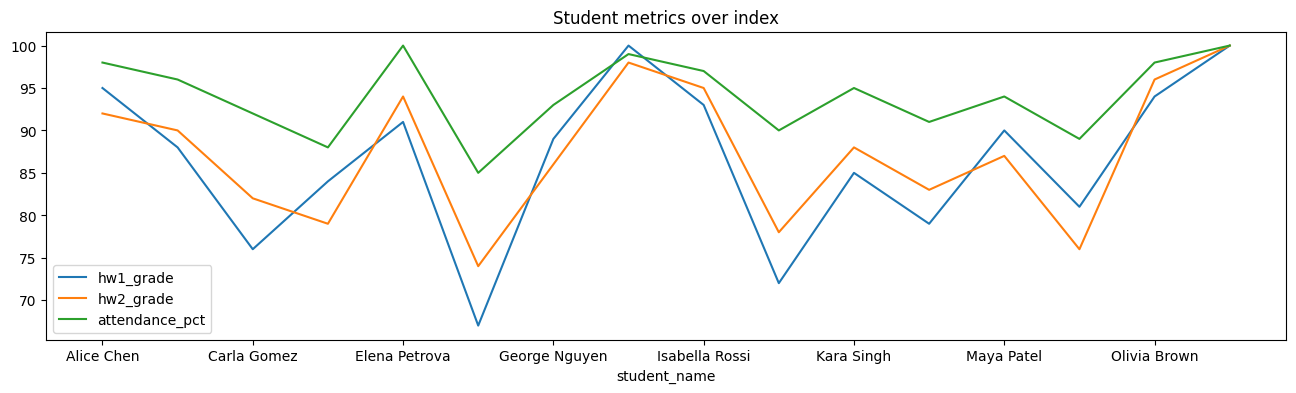

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
# Set default figure size to be very wide for better visualization
plt.rcParams['figure.figsize'] = (16, 4)


# Choose numeric columns for plotting examples
numeric_cols = ["hw1_grade", "hw2_grade", "attendance_pct"]

# 1) Line plot: plot all numeric series over the row index (ordered axis)
df_students.set_index("student_name")[numeric_cols].plot(title="Student metrics over index")  # multiple lines
plt.show()  # render the figure in the notebook

## Bar plot: compare numeric values across categorical x (student index)

- Suitable data: categorical or ordinal x with aggregated numeric y (counts, means)
- Shows: differences across groups clearly; good for rank order and comparisons
- Use when: comparing categories; avoid with too many categories or when x is truly continuous

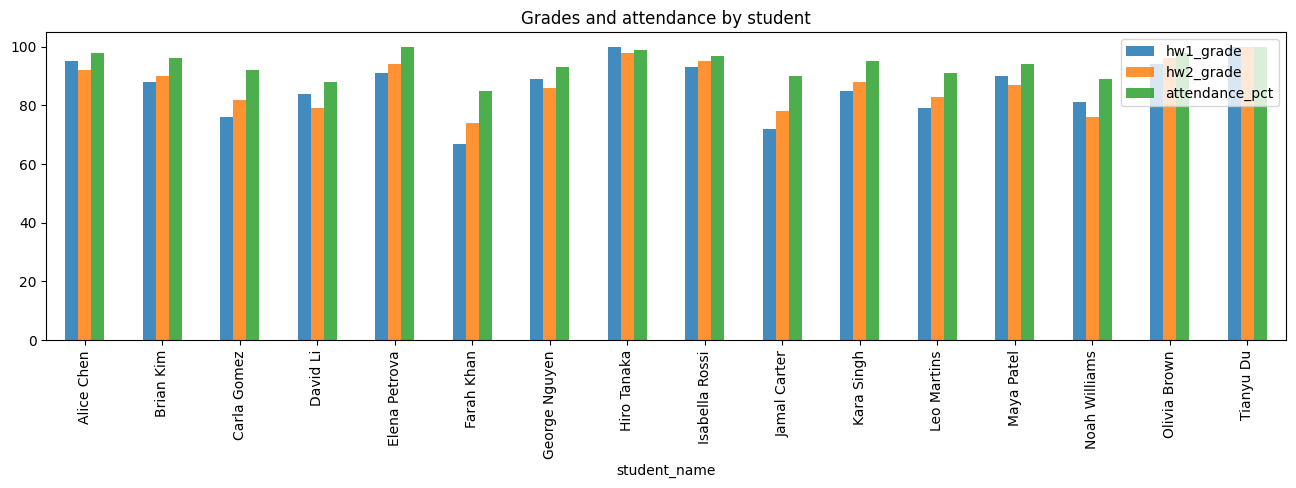

In [47]:
df_students.set_index("student_name")[numeric_cols].plot.bar(title="Grades and attendance by student", alpha=0.85)  # alpha controls opacity
plt.show()  # render


## Scatter: relationship between two numeric columns

- Suitable data: two continuous numeric variables; optional color/size for a third variable
- Use when: exploring associations; avoid if points are too dense—consider hexbin

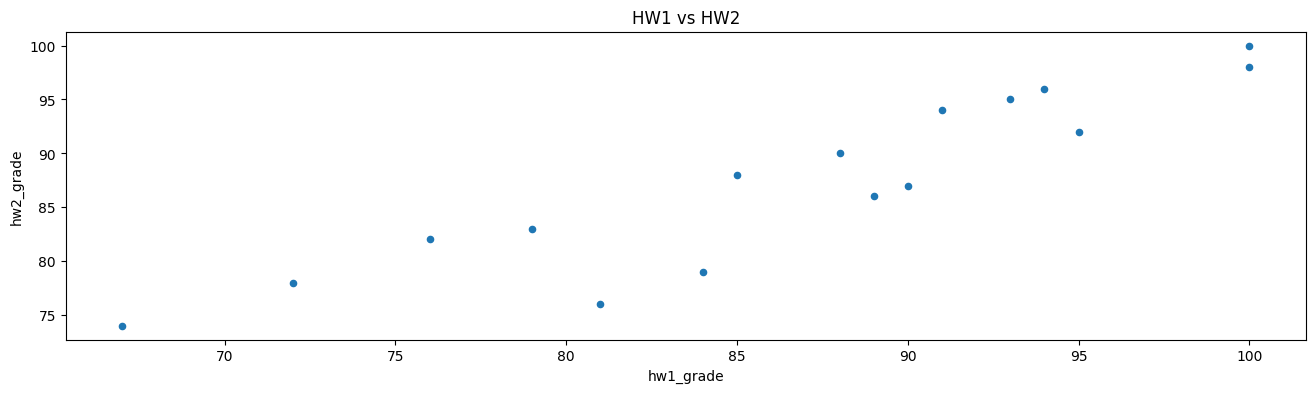

In [48]:
df_students.plot.scatter(x="hw1_grade", y="hw2_grade", title="HW1 vs HW2")  # point per student
plt.show()  # render


## Histogram: distribution of each numeric column (overlaid)

- Suitable data: one continuous numeric variable
- Shows: how values are distributed across bins; choose bin count with care
- Use when: comparing distributions or checking skew/outliers; avoid for categorical data

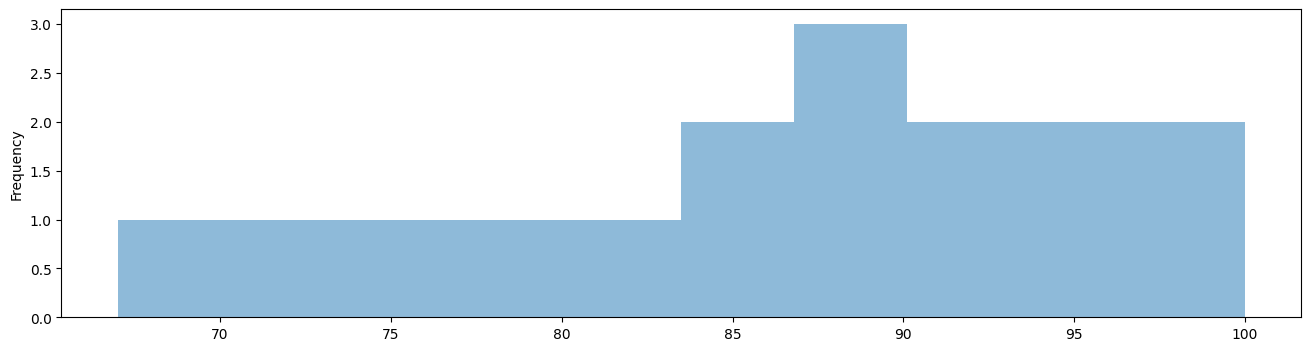

In [49]:
df_students["hw1_grade"].plot.hist(alpha=0.5)
plt.show()  # render


## Area: emphasize cumulative totals/contributions over an ordered x-axis

- Suitable data: one or more numeric series over an ordered x (often time)
- Shows: cumulative values and how parts contribute to the total
- Use when: you want to emphasize totals and composition over time; avoid with many overlapping categories

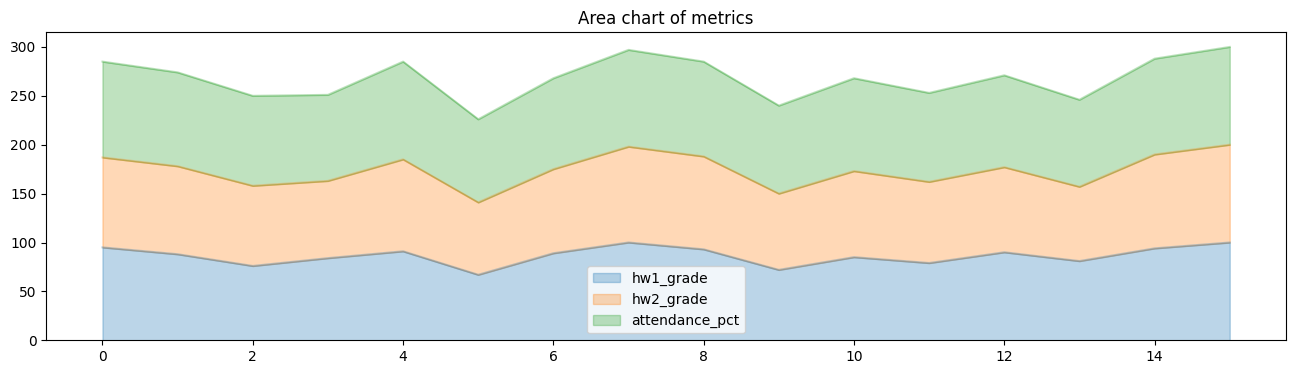

In [50]:
df_students[numeric_cols].plot.area(title="Area chart of metrics", alpha=0.3)  # stacked by default
plt.show()  # render


## Pie: part-to-whole proportions (few categories); first bucketize HW1 into letter bins

- Suitable data: one categorical variable with a small number of categories (≈3–6) and their proportions
- Shows: relative contributions of categories to a single whole
- Use when: you have few, clearly distinct parts; avoid for precise comparison—bar charts are often better

In [51]:
df_students

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade,grade
0,Alice Chen,95,92,98,True,93.5,A
1,Brian Kim,88,90,96,False,89.0,P
2,Carla Gomez,76,82,92,True,79.0,C
3,David Li,84,79,88,False,81.5,NP
4,Elena Petrova,91,94,100,True,92.5,A
5,Farah Khan,67,74,85,False,70.5,NP
6,George Nguyen,89,86,93,True,87.5,B
7,Hiro Tanaka,100,98,99,False,99.0,P
8,Isabella Rossi,93,95,97,True,94.0,A
9,Jamal Carter,72,78,90,False,75.0,P


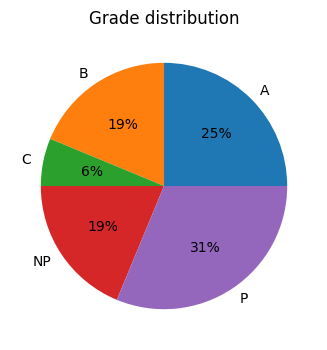

In [52]:
df_students["grade"].value_counts().sort_index().plot.pie(autopct="%1.0f%%", ylabel="", title="Grade distribution")
plt.show()  # render


## Box plot: summarize distributions (median, quartiles, outliers) per variable

- Suitable data: one continuous numeric variable; optionally split by a categorical variable to compare groups
- Shows: median, quartiles (IQR), whiskers, and outliers; robust to skew
- Use when: you want a compact summary of distributions across groups; avoid when sample sizes are tiny



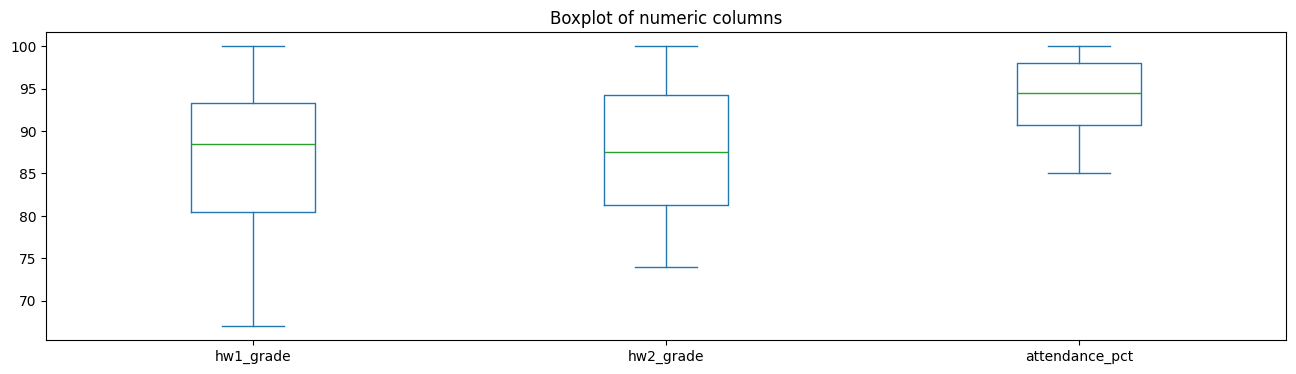

In [53]:
df_students[numeric_cols].plot.box(title="Boxplot of numeric columns")
plt.show()  # render

# Merging Multiple Dataframes with `DataFrame.merge` (Optional)

- Basic idea: join two tables by matching values in key columns (like SQL joins)
- `how=` picks the join type (`"inner"`, `"left"`, `"right"`, `"outer"`)
- Use `on=` for same-named keys, or `left_on=`/`right_on=` if names differ
- Add `indicator=True` to see where rows came from; use `validate="m:1"` or `"1:1"` to catch unexpected duplicates

Example: Imagine two spreadsheets: one with grades, one with majors. Merge combines them by lining up rows with the same student name.

Reference: [DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).


## (Most Popular) Left joins (`how="left"`) keep all rows from the left DataFrame and drop unmatched right rows—useful for enriching a primary fact table.

1. Let's call the left table the primary table, and the right table the supplemental table.
2. For each row in the primary table, get the value of the matching key column (e.g., `student_name`, and the name is `Tianyu Du`).
3. Look up the matching row in the supplemental table (i.e., look for the rows with `student_name` being `Tianyu Du` in the supplemental right table).
4. Append the data from the supplemental table to the row in the primary table.
5. If not found, values are left NaN.

In [54]:
df_students  # the main table we are working on.

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade,grade
0,Alice Chen,95,92,98,True,93.5,A
1,Brian Kim,88,90,96,False,89.0,P
2,Carla Gomez,76,82,92,True,79.0,C
3,David Li,84,79,88,False,81.5,NP
4,Elena Petrova,91,94,100,True,92.5,A
5,Farah Khan,67,74,85,False,70.5,NP
6,George Nguyen,89,86,93,True,87.5,B
7,Hiro Tanaka,100,98,99,False,99.0,P
8,Isabella Rossi,93,95,97,True,94.0,A
9,Jamal Carter,72,78,90,False,75.0,P


In [55]:
# roster = pd.read_csv("student_roster.csv")        # right table: roster metadata
roster = pd.read_csv("https://raw.githubusercontent.com/TianyuDu/CME193-Autumn-2025/refs/heads/main/notebooks/student_roster.csv")
roster

,student_name,section,major
0,Alice Chen,A,CME
1,Brian Kim,B,CS
2,Carla Gomez,A,Stats
3,David Li,B,Math
4,Elena Petrova,C,CME
5,Farah Khan,B,CS
6,George Nguyen,A,CME
7,Hiro Tanaka,C,Stats
8,Isabella Rossi,B,Math
9,Jamal Carter,A,CS


### Note: Tianyu Du from the left (main) table is not in the right (supplemental) table (kept).
### Zoe Park is in the supplemental table but not in the main table (dropped).

In [56]:
merged = df_students.merge(roster, on="student_name", how="left")
merged

,student_name,hw1_grade,hw2_grade,attendance_pct,letter_grade,hw_grade,grade,section,major
0,Alice Chen,95,92,98,True,93.5,A,A,CME
1,Brian Kim,88,90,96,False,89.0,P,B,CS
2,Carla Gomez,76,82,92,True,79.0,C,A,Stats
3,David Li,84,79,88,False,81.5,NP,B,Math
4,Elena Petrova,91,94,100,True,92.5,A,C,CME
5,Farah Khan,67,74,85,False,70.5,NP,B,CS
6,George Nguyen,89,86,93,True,87.5,B,A,CME
7,Hiro Tanaka,100,98,99,False,99.0,P,C,Stats
8,Isabella Rossi,93,95,97,True,94.0,A,B,Math
9,Jamal Carter,72,78,90,False,75.0,P,A,CS


In [57]:
# for example: we can compute the average homework grade for each section.
merged.groupby("section").agg({"hw1_grade": "mean"})

,hw1_grade
section,
A,84.4
B,83.0
C,91.0


### There are other ways to merge two tables (i.e., right join, outer join, inner join, etc.), we don't have time to cover all of them here. But I personally recommend you to read this Medium article: https://medium.com/data-science/how-to-merge-pandas-dataframes-35afe8b1497co

![image](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Vq8e0dAr0Xsfw0bJRz4FRg.png)

### A quick note on Dask
Dask DataFrame mirrors much of the pandas API and can scale workflows beyond memory and across cores/clusters. See the [Dask DataFrame docs](https://docs.dask.org/en/stable/dataframe.html).
